In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Dados/queimadas_pb.csv")
df.head()

,ano,mes,data,bioma,id_municipio,latitude,longitude,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
0,2007,1,2007-01-01,Caatinga,2511301,-7.125,-37.905,5,3.552308,0.447115,6.852830
1,2007,1,2007-01-02,Caatinga,2509396,-7.246,-37.334,4,0.007273,0.499091,8.625000
2,2007,1,2007-01-02,Caatinga,2512200,-7.653,-37.094,7,1.117200,0.601000,6.205455
3,2007,1,2007-01-03,Mata Atlântica,2503001,-7.482,-34.877,0,0.059474,0.845789,19.409524
4,2007,1,2007-01-03,Caatinga,2509701,-7.806,-37.132,4,0.800926,0.571420,11.135088


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59239 entries, 0 to 59238
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ano                      59239 non-null  int64  
 1   mes                      59239 non-null  int64  
 2   data                     59239 non-null  object 
 3   bioma                    59239 non-null  object 
 4   id_municipio             59239 non-null  int64  
 5   latitude                 59239 non-null  float64
 6   longitude                59239 non-null  float64
 7   dias_sem_chuva           59239 non-null  int64  
 8   precipitacao             59239 non-null  float64
 9   risco_fogo               59239 non-null  float64
 10  potencia_radiativa_fogo  59239 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 5.0+ MB


| **Insight**                                              | **Objetivo / O que analisar**                                                                                                                                   |
| -------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Ano com mais queimadas e menos chuvas**             | Identificar o ano com maior número de registros de queimadas e comparar com a média de `precipitacao`. |
| **2. Mês com mais queimadas e menos chuvas**             | Mesma ideia do anterior, mas em nível mensal. Pode revelar sazonalidade das queimadas .                                                       |
| **3. Bioma com maior risco de fogo**                     | Agrupar por `bioma` e analisar a média ou máximo de `risco_fogo`, para identificar onde o ambiente está mais vulnerável.                                        |
| **4. Latitude e longitude com mais queimadas**           | Encontrar os pontos geográficos com maior frequência de registros.             |
| **5. Precipitação e dias sem chuva com o risco de fogo** | Analisar correlação entre `precipitacao`, `dias_sem_chuva` e `risco_fogo`.                                        |
| **6. Relação entre bioma e precipitação média**           | Verificar se biomas com menor precipitação média têm maior risco de fogo.                                                                                       |
| **7. Mês x Risco de fogo por município**                  | Identificar meses mais críticos por município para ações preventivas direcionadas.                                                                              |
| **8. Correlação entre potência radiativa e risco de fogo**| Verificar se maior potência radiativa indica maior risco de fogo.                                                                                              |
| **9. Análise sazonal dos dias sem chuva e queimadas**     | Investigar se aumentos nos dias sem chuva em certos meses estão ligados a mais queimadas.                                                                       |
| **10. Mapa de hotspots de queimadas por bioma**           | Criar mapas para visualizar concentrações geográficas de queimadas em cada bioma.                                                                              |
| **11. Impacto das queimadas na precipitação subsequente** | Verificar se áreas com mais queimadas apresentam alteração na precipitação nos meses seguintes.                                                                |


# EDA

In [4]:
df.describe()

,ano,mes,id_municipio,latitude,longitude,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
count,59239.000000,59239.000000,5.923900e+04,59239.000000,59239.000000,59239.000000,59239.000000,59239.000000,59239.000000
mean,2020.177079,9.031196,2.509047e+06,-7.090382,-37.303661,23.784011,0.453176,0.863179,26.036148
std,6.385059,3.656072,5.021804e+03,0.403291,1.245731,28.158001,2.659578,0.269196,39.578977
min,2003.000000,1.000000,2.500106e+06,-8.294000,-38.762050,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,9.000000,2.504405e+06,-7.397800,-38.264430,4.000000,0.000000,0.874737,5.400000
50%,2023.000000,10.000000,2.509404e+06,-7.082660,-37.836940,11.000000,0.000000,1.000000,11.300000
75%,2024.000000,11.000000,2.513604e+06,-6.793420,-36.189995,34.000000,0.074141,1.000000,27.444974
max,2025.000000,12.000000,2.517407e+06,-6.052000,-34.796130,120.000000,107.730000,1.000000,905.600000


## 1. Ano com as queimadas mais intensas e menos chuvas

In [16]:
ano_queimadas_chuvas = df.groupby("ano")[["potencia_radiativa_fogo", "precipitacao"]].mean().reset_index()

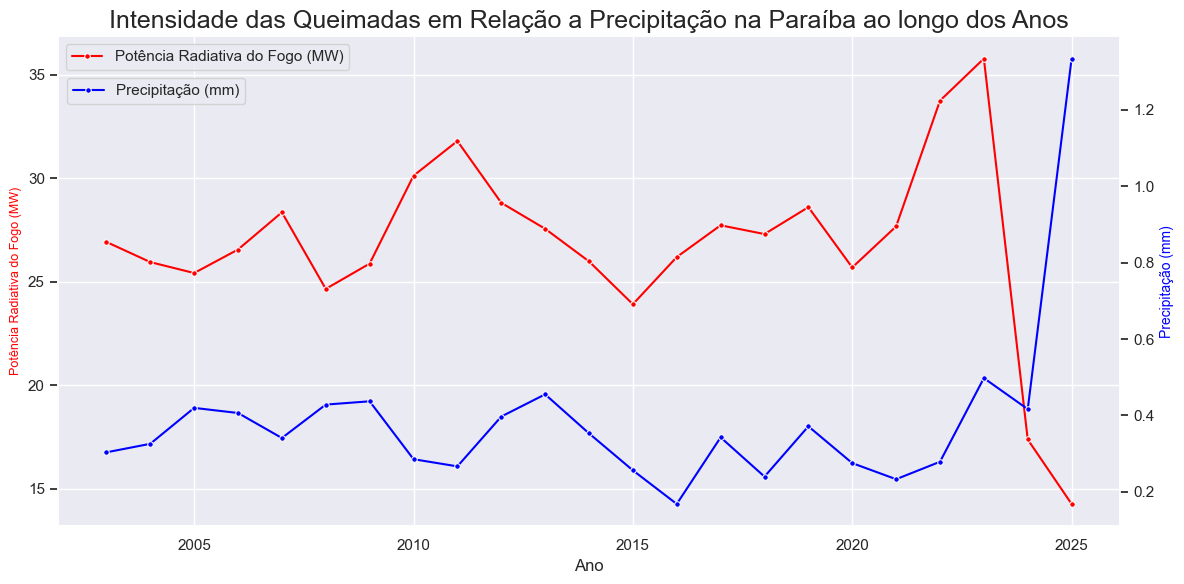

In [30]:
sns.set_theme(style="darkgrid")
fig,ax = plt.subplots(figsize=(12, 6))

sns.lineplot(ano_queimadas_chuvas, x="ano", y="potencia_radiativa_fogo", errorbar=None, ax=ax, label="Potência Radiativa do Fogo (MW)", color="red", marker="o", markersize=4)
ax.set_ylabel("Potência Radiativa do Fogo (MW)", color="red", fontsize=9)
ax.set_xlabel("Ano")

ax1 = ax.twinx()
sns.lineplot(ano_queimadas_chuvas, x="ano", y="precipitacao", errorbar=None, ax=ax1, color="blue", label="Precipitação (mm)", marker="o", markersize=4)
ax1.set_ylabel("Precipitação (mm)", color="blue", fontsize=10)
ax1.legend(loc="upper left", bbox_to_anchor=(0.001, 0.93))
ax1.set_facecolor("#0407070B")
ax1.grid(False)

plt.title("Intensidade das Queimadas em Relação a Precipitação na Paraíba ao longo dos Anos", fontsize=18)
plt.tight_layout()
plt.show()

Os dados indicam que, ao longo dos anos, anos com menos chuva, como 2010, 2011 e 2015, registraram maior atividade de queimadas, o que reforça a influência do clima seco nesse tipo de ocorrência. No entanto, há exceções, como o ano de 2023, que apresentou alta potência radiativa mesmo com um dos maiores índices de chuva da série, sugerindo que outros fatores também contribuem significativamente. A queda brusca nas queimadas em 2024 e 2025, especialmente com uma precipitação atípica em 2025, o que pode estar relacionada à menor quantidade de dados disponíveis nesses anos em comparação aos anteriores.

## 2. Meses com maior intensidade de quiemadas e menos chuvas

In [18]:
mes_queimadas_chuvas = df.groupby("mes")[["potencia_radiativa_fogo", "precipitacao"]].mean().reset_index()

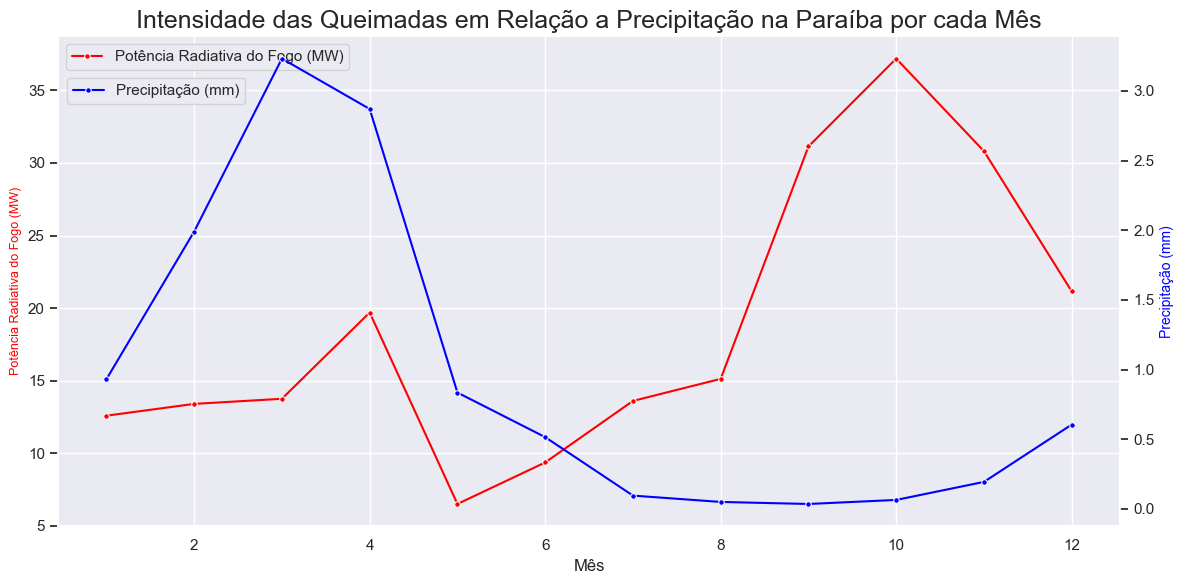

In [29]:
fig,ax = plt.subplots(figsize=(12, 6))

sns.lineplot(mes_queimadas_chuvas, x="mes", y="potencia_radiativa_fogo", errorbar=None, ax=ax, label="Potência Radiativa do Fogo (MW)", color="red", marker="o", markersize=4)
ax.set_ylabel("Potência Radiativa do Fogo (MW)", color="red", fontsize=9)
ax.set_xlabel("Mês")

ax1 = ax.twinx()
sns.lineplot(mes_queimadas_chuvas, x="mes", y="precipitacao", errorbar=None, ax=ax1, color="blue", label="Precipitação (mm)", marker="o", markersize=4)
ax1.set_ylabel("Precipitação (mm)", color="blue", fontsize=10)
ax1.legend(loc="upper left", bbox_to_anchor=(0.001, 0.93))
ax1.set_facecolor("#0407070B")
ax1.grid(False)

plt.title("Intensidade das Queimadas em Relação a Precipitação na Paraíba por cada Mês", fontsize=18)
plt.tight_layout()
plt.show()

A análise revela uma clara sazonalidade das queimadas: os meses de setembro, outubro e novembro registram os maiores níveis de potência radiativa, indicando o pico das queimadas, enquanto a precipitação nesses mesmos meses é extremamente baixa, chegando a quase zero. Em contraste, os meses de fevereiro a abril apresentam os maiores volumes de chuva e, consequentemente, níveis muito menores de queimadas. Esse padrão reforça a forte influência da seca na intensificação das queimadas.

## 3. Biomas com Maior Risco de Fogo em Relação a Precipitação

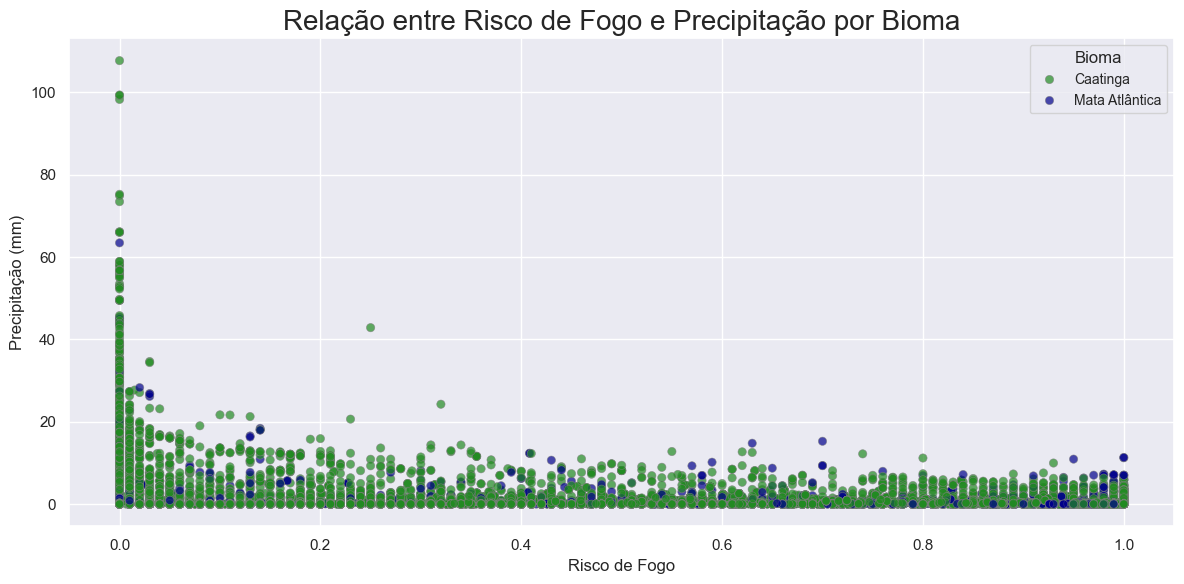

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="risco_fogo", y="precipitacao", hue="bioma", palette={"Caatinga": "forestgreen", "Mata Atlântica": "darkblue"}, alpha=0.7, edgecolor='gray')
plt.title("Relação entre Risco de Fogo e Precipitação por Bioma", fontsize=20)
plt.xlabel("Risco de Fogo", fontsize=12)
plt.ylabel("Precipitação (mm)", fontsize=12)
plt.legend(title="Bioma", title_fontsize=12, fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

Os dados mostram que, quanto maior a precipitação, menor tende a ser o risco de fogo. Apesar da predominância de registros no bioma Caatinga, os padrões observados são semelhantes aos da Mata Atlântica, com médias muito próximas tanto para a precipitação quanto para o risco de fogo. Isso sugere que, neste conjunto de dados, o bioma por si só não é um fator determinante para o risco de fogo, sendo a precipitação um elemento mais influente nesse comportamento.